## Introduction

We'll continue working with the World Happiness Report and explore another aspect of it that we haven't analyzed yet - the factors that contribute happiness. As a reminder, the World Happiness Report assigns each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10.

Each of the columns below contains the estimated extent to which each factor contributes to the happiness score:
- `Economy (GDP per Capita)`
- `Family`
- `Health (Life Expectancy)`
- `Freedom`
- `Trust (Government Corruption)`
- `Generosity`

Throughout this mission, we'll refer to the columns above as the "factor" columns. We'll work to answer the following question in this mission:

_Which of the factors above contribute the most to the happiness score?_

However, in order to answer this question, we need to manipulate our data into a format that makes it easier to analyze. We'll explore the following functions and methods to perform this task:
- `Series.map()`
- `Series.apply()`
- `DataFrame.applymap()`
- `DataFrame.apply()`
- `pd.melt()`

Below are descriptions for some of the other columns we'll work with in this mission:
- `Country` - Name of the country
- `Region` - Name of the region the country belongs to
- `Happiness Rank` - The rank of the country, as determined by its happiness score
- `Happiness Score` - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
- `Dystopia Residual` - Represents the extent to which the factors above over or under explain the happiness score. Don't worry too much about this column - you won't need in depth knowledge of it to complete this mission.

In [1]:
import pandas as pd
import numpy as np

In [2]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [3]:
# Dictionary to help rename columns
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust'}

In [4]:
happiness2015 = happiness2015.rename(mapping, axis=1)

### Apply a Function Element-wise Using the Map and Apply Methods

While reviewing `happiness2015`, we noticed that each of the "factor" columns consists of numbers. Each number represents the extent to which each factor contributes to the happiness score.

However, not only is this definition a little hard to understand, but it can also be challenging to analyze all of these numbers across multiple columns. Instead, we can first convert these numbers to categories that indicate whether the factor has a _high_ impact on the happiness score or a _low_ impact.

Although pandas provides many built-in functions for common data cleaning tasks, in this case, the tranformation we need to perform is so specific to our data that one doesn't exist. Luckily, pandas has a couple methods that can be used to apply a custom function like the one above to our data, starting with the following two methods:
- `Series.map()` method
- `Series.apply()` method

Both methods above apply a function element-wise to a column. When we say element-wise, we mean that we pass the function one value in the series at a time and it performs some kind of transformation.

<img src='_images/Map_generic.svg' />

We use the following syntax for both methods:

<img src='_images/Map_Apply_Syntax.svg' />

Note that these methods both take a function as a parameter. Because we're using the function as a parameter, we pass it into the function without the parentheses. For example, if we were working with a function called transform, we'd pass it into the apply() method as follows:
```
def transform(val):
    return val
Series.apply(transform)
```

In [5]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

In [6]:
economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)

equal = economy_impact_map.equals(economy_impact_apply)

### Apply a Function Element-wise Using the Map and Apply Methods Continued

The methods `Series.map()` and `Series.apply()` don't modify the original series. If we want to work with the new series in the original dataframe, we must either assign the results back to the original column or create a new column. It is recommended to create a new column, in case we need to reference the original values.

In [7]:
happiness2015['Economy Impact'] = economy_impact_apply
happiness2015[['Economy', 'Economy Impact']].head()

,Economy,Economy Impact
0,1.39651,High
1,1.30232,High
2,1.32548,High
3,1.45900,High
4,1.32629,High


To create the `Economy Impact` column, `map()` and `apply()` iterate through the `Economy` column and pass each value into the `label` function. The function evaluates which range the value belongs to and assigns the corresponding value to the element in the new column.

<img src='_images/Map.svg' />

Since both `map` and `apply` can apply functions element-wise to a series, there are still difference between them. In the `label` function, we arbitrarily split the values into 'High' and 'Low'. What if instead we allowed that number to be passed into the function as an argument?
```
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_map = happiness2015['Economy'].map(label, x = .8)
```
When we try to apply the function to the `Economy` column with the `map` method, we get an error:
```
TypeError: map() got an unexpected keyword argument 'x'
```

Let's confirm the behavior of the `apply` method next.

In [8]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
    
economy_impact_apply = happiness2015['Economy'].apply(label, x=0.8)

### Apply a Function Element-wise to Multiple Columns Using Applymap Method

We can only use the `Series.apply()` method to apply a function with additional arguments element-wise - the `Series.map()` method will return an error.

If we wanted to transform more than one column, we could use the Series.map() or Series.apply() method to transform them as follows:
```
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015['Economy Impact'] = happiness2015['Economy'].apply(label)
happiness2015['Health Impact'] = happiness2015['Health'].apply(label)
happiness2015['Family Impact'] = happiness2015['Family'].apply(label)
```
However, it would be easier to just apply the same function to all of the factor columns (`Economy`, `Health`, `Family`, `Freedom`, `Generosity`, `Trust`) at once. Fortunately, however, pandas already has a method that can apply functions element-wise to multiple columns at once - the `DataFrame.applymap()` method.

We'll use the following syntax to work with the `df.applymap()` method:

<img src='_images/Applymap_syntax.svg' />

Just like with the `Series.map()` and `Series.apply()` methods, we need to pass the function name into the `df.applymap()` method without parentheses.

In [9]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

factors_impact = happiness2015[factors].applymap(label)

### Apply Functions along an Axis using the Apply Method

Let's summarize what we learned so far:

| Method | Series or Dataframe Method | Applies Functions Element-wise? |
| - | - | - |
| Map | Series | Yes |
| Apply | Series | Yes |
| Applymap | Dataframe | Yes |

__Note:__ We can also use the `apply()` method on a dataframe, but the `DataFrame.apply()` method has different capabilities. Instead of applying functions element-wise, the `df.apply()` method applies functions along an axis, either column-wise or row-wise. When we create a function to use with `df.apply()`, we set it up to accept a series, most commonly a column.

In [10]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


We see that `Family` and `Economy` coluns contain the most 'High' values.

When we applied the `pd.value_counts` function to `factors_impact`, it calculated the value counts for the first column, `Economy`, then the second column, `Family`, so on and so forth:
<img src='_images/Apply_counts.svg'>

Notice that we used the `df.apply()` method to transform multiple columns. This is only possible because the `pd.value_counts` function operates on a _series_. If we tried to use the `df.apply()` method to apply a function that works _element-wise_ to multiple columns, we'd get an error:
```
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015[factors].apply(label)
```
```
ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', u'occurred at index Economy')
```

#### Tasks:
- Create a function that calculates the percentage of 'High' and 'Low' values in each column.
    - Create a function named `v_counts` that accepts one parameter called `col`.
    - Use the `Series.value_counts()` method to calculate the value counts for `col`. Assign the result to `num`.
    - Use the `Series.size` attribute to calculate the number of rows in the column. Assign the result to `den`.
    - Divide `num` by `den` and return the result.
- Use the `df.apply()` method to apply the `v_counts` function to all of the columns in `factors_impact`. Assign the result to `v_counts_pct`.


In [11]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

v_counts_pct = factors_impact.apply(v_counts)

### Apply Functions along an Axis using the Apply Method Continued

In general, we should only use the `apply()` method when a vectorized function does not exist. Recall that pandas uses _vectorization_, the process of applying operations to whole series at once, to optimize performance. When we use the `apply()` method, we're actually looping through rows, so a vectorized method can perform an equivalent task faster than the `apply()` method.

We'll compare two different ways of performing an analysis task. First, we'll use the `df.apply()` method to transform the data. Then, we'll look at an alternate way to perform the same task with vectorized methods.

__Note:__ The sum of the six factors and the `Dystopia Residual` column equals the happiness score

In [12]:
# Calculate the sum of the factor columns in each row
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].sum(axis=1)

# Display the first five rows of the result and the Happiness Score column
happiness2015[['Happiness Score', 'Factors Sum']].head()

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


The values we calculated in the `Factors Sum` column are slightly different than the values in the `Happiness Score` column, but the differences are so minor that we can attribute them to rounding.

#### Tasks:
- Create a function that converts each of the six factor columns and the `Dystopia Residual` column to percentages.
    - Create a function named `percentages` that accepts one parameter called `col`.
    - Divide `col` by the `Happiness Score` column. Assign the result to `div`.
    - Multiply `div` by 100 and return the result.
- Use the `df.apply()` method to apply the `percentages` function to all of the columns in `factors`. Assign the result to `factor_percentages`.

In [13]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

In [14]:
def percentages(col):
    div = col/happiness2015['Happiness Score']
    return div*100

factor_percentages = happiness2015[factors].apply(percentages)

In [15]:
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


### Reshaping Data with the Melt Function

However, it would be easier to convert these numbers into percentages, plot the results, and perform other data analysis tasks if we first reshaped the dataframe so that one column holds the values for all six factors and the `Dystopia Residual` column. We can accomplish this with the `pd.melt()` function.

To demonstrate this function, let's just work with a subset of `happiness2015` called `happy_two`.

In [16]:
happy_two = happiness2015[['Country', 'Happiness Score', 'Economy', 'Family', 'Health']][:2]

In [17]:
happy_two

,Country,Happiness Score,Economy,Family,Health
0,Switzerland,7.587,1.39651,1.34951,0.94143
1,Iceland,7.561,1.30232,1.40223,0.94784


We use the `melt` function to reshape `happy_two` so that the values for `Economy`, `Family`, and `Health` reside in the same column.

In [18]:
pd.melt(happy_two, id_vars=['Country'], value_vars=['Economy', 'Family', 'Health'])

,Country,variable,value
0,Switzerland,Economy,1.39651
1,Iceland,Economy,1.30232
2,Switzerland,Family,1.34951
3,Iceland,Family,1.40223
4,Switzerland,Health,0.94143
5,Iceland,Health,0.94784


Now, we can use vectorized operations to transform the `value` column at once!

Here's a summary of the syntax we used to work with the melt function:

<img src='_images/Melt_Syntax.svg'>

#### Tasks:

- Use the `melt` function to reshape `happiness2015`. The columns listed in `main_cols` should stay the same. The columns listed in `factors` should be transformed into rows. Assign the result to a variable called `melt`.
- Convert the `value` column to a percentage.
    - Divide the `value` column by the `Happiness Score` column and multiply the result by `100`.
    - Use the `round()` function to round the result to 2 decimal places.
    - Assign the result to a new column called `Percentage`.

In [22]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']

# Since we have already created this list, we will comment it here. This is for the exercise purpose only.
#factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)

melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

The `melt` function moved the values in the seven columns - `Economy`, `Health`, `Family`, `Freedom`, `Generosity`, `Trust`, and `Dystopia Residual` - to the same column, which meant we could transform them all at once.

Notice that now the data is in a format that makes it easier to aggregate. We refer to data in this format as _tidy_ data.

Next, let's group the data by the `variable` column, find the mean value of each variable (or factor), and plot the results to see how much each factor contributes to the happiness score on average.

## Challenge: Aggregate the Data and Create a Visualization

- Use the `df.pivot_table()` method to create a pivot table from the `melt` dataframe. Set the `variable` column as the `index` and the `value` column as the `values`. Assign the result to `pv_melt`.
- Use the `df.plot()` method to create a pie chart of the results. Set the `kind` parameter to `'pie'`, the `y` parameter to `'value'`, and the `legend` parameter to `False`, so we can better see the results.
- If we disregard `Dystopia Residual`, which two factors, on average, contribute the most to the happiness score?

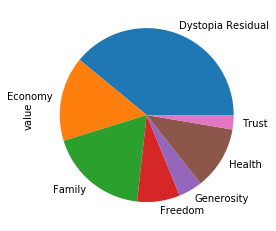

In [23]:
pv_melt = melt.pivot_table(index='variable', values='value')

pv_melt.plot(kind='pie', y= 'value', legend= False)

If we disregard `Dystopia Residual`, on average, `Economy` and `Family` contribute the most to the happiness score?\

### Summary:

In this mission, we learned how to transform data using the `Series.map()`, `Series.apply()`, `DataFrame.apply()`, and `DataFrame.applymap()` methods along with the `pd.melt()` function. Below is a summary chart of the differences between the `map()`, `apply()`, and `applymap()` methods:

|Method|Series or Dataframe Method|Applies Functions Element-wise?|
|-|-|-|
|Map|Series|Yes|
|Apply|Series|Yes|
|Applymap|Dataframe|Yes|
|Apply|Dataframe|No, applies functions along an axis|

As you explore pandas, you'll also find that pandas has a method to "un-melt" the data, or transform rows into columns. This method is called the `df.pivot()` method, not to be confused with the `df.pivot_table()` method used to aggregate data.